In [11]:
# Laurent LEQUIEVRE
# Research Engineer, CNRS (France)
# Institut Pascal UMR6602
# laurent.lequievre@uca.fr

# CartPole

<img src="cartpole.png">

https://github.com/openai/gym/blob/master/gym/envs/classic_control/cartpole.py
    
# Description:
A pole is attached by an un-actuated joint to a cart, which moves along a frictionless track. The pendulum starts upright, and the goal is to
prevent it from falling over by increasing and reducing the cart's velocity.
# Source:
    This environment corresponds to the version of the cart-pole problem described by Barto, Sutton, and Anderson
# Observation:
    Type: Box(4)
    Num     Observation               Min                     Max
    0       Cart Position             -4.8                    4.8
    1       Cart Velocity             -Inf                    Inf
    2       Pole Angle                -0.418 rad (-24 deg)    0.418 rad (24 deg)
    3       Pole Angular Velocity     -Inf                    Inf
# Actions:
    Type: Discrete(2)
    Num   Action
    0     Push cart to the left
    1     Push cart to the right
    Note: The amount the velocity that is reduced or increased is not fixed; it depends on the angle the pole is pointing. This is because the center of gravity of the pole increases the amount of energy needed to move the cart underneath it
# Reward:
    Reward is 1 for every step taken, including the termination step
# Starting State:
    All observations are assigned a uniform random value in [-0.05..0.05]
# Episode Termination:
    - Pole Angle is more than 12 degrees.
    - Cart Position is more than 2.4 (center of the cart reaches the edge of the display).
    - Episode length is greater than 200.
    Solved Requirements:
    Considered solved when the average return is greater than or equal to
    195.0 over 100 consecutive trials.

In [17]:
import gym

In [18]:
env = gym.make('CartPole-v0')  # CartPole-v0 only runs for 200 steps. CartPole-v1 runs for 500 steps.

<img src="gym_openai.png">

# Environment comes with an action_space and an observation_space :

These attributes are of type Space, and they describe the format of valid actions and observations.

The 'Discrete' space allows a fixed range of non-negative numbers.
- Discrete(2) -> in this case valid actions are either 0 or 1.
- Discrete(8) -> Set with 8 elements {0, 1, 2, ..., 7}

The 'Box' space represents an n-dimensional box.
- Box(4,) -> valid observations will be an array of 4 numbers (in that example, there is only one dimension).

In [19]:
# About action and observation space

# action_space
print("action space = {}".format(env.action_space)) # Discrete(2)
print("nb actions = {}".format(env.action_space.n)) # 2
# 0 Push cart to the left
# 1 Push cart to the right

for _ in range(3):
    # Randomly sample an element of this space => random(2) (just to test)
    print("a sample of action = {}".format(env.action_space.sample()))
    
# observation_space
# observation = x position of cart, x velocity of cart, angular position of pole, angular velocity of pole
print("observation space = {}".format(env.observation_space))
print("observation space shape = {}".format(env.observation_space.shape)) # (4,)

# We can also check the observation Box’s bounds
print("observation high = {}".format(env.observation_space.high))
print("observation low = {}".format(env.observation_space.low))

# Observation limits in details
print("x cart pos high = {}".format(env.observation_space.high[0])) # 4.8
print("x cart pos low = {}".format(env.observation_space.low[0])) # -4.8

print("x cart velocity high = {}".format(env.observation_space.high[1])) # Inf
print("x cart velocity low = {}".format(env.observation_space.low[1])) # -Inf

print("Angular pole pos high = {}".format(env.observation_space.high[2])) # 0.418 rad (~ 24 deg)
print("Angular pole pos low = {}".format(env.observation_space.low[2])) # -0.418 rad (~ -24 deg)

print("Angular pole velocity high = {}".format(env.observation_space.high[3])) # Inf
print("Angular pole velocity low = {}".format(env.observation_space.low[3])) # -Inf


action space = Discrete(2)
nb actions = 2
a sample of action = 0
a sample of action = 0
a sample of action = 1
observation space = Box(-3.4028234663852886e+38, 3.4028234663852886e+38, (4,), float32)
observation space shape = (4,)
observation high = [4.8000002e+00 3.4028235e+38 4.1887903e-01 3.4028235e+38]
observation low = [-4.8000002e+00 -3.4028235e+38 -4.1887903e-01 -3.4028235e+38]
x cart pos high = 4.800000190734863
x cart pos low = -4.800000190734863
x cart velocity high = 3.4028234663852886e+38
x cart velocity low = -3.4028234663852886e+38
Angular pole pos high = 0.41887903213500977
Angular pole pos low = -0.41887903213500977
Angular pole velocity high = 3.4028234663852886e+38
Angular pole velocity low = -3.4028234663852886e+38


# The 'step' function returns four values :

- observation (object): 
an environment-specific object representing your observation of the environment. 
For example, pixel data from a camera, joint angles and joint velocities of a robot, or the board state in a board game.

- reward (float): 
amount of reward achieved by the previous action. 
The scale varies between environments, but the goal is always to increase your total reward.

- done (boolean): 
whether it’s time to reset the environment again. 
Most (but not all) tasks are divided up into well-defined episodes, and done being True indicates the episode has terminated. 
(For example, perhaps the pole tipped too far, or you lost your last life.)

- info (dict): 
diagnostic information useful for debugging. 
It can sometimes be useful for learning (for example, it might contain the raw probabilities behind the environment’s last state change). 
However, official evaluations of your agent are not allowed to use this for learning.


Example for CartPole : array([-0.00842369, -0.17244261, -0.0034994 ,  0.24360119]), 1.0, False, {}
    
    observation = array([x position of cart, x velocity of cart, angular position of pole, angular velocity of pole])
    reward = 1.0
    done = False
    info = {}
    
# The 'reset' function returns :

- observation (object): 
an environment-specific object representing your observation of the environment. 
For example, pixel data from a camera, joint angles and joint velocities of a robot, or the board state in a board game.


# About 'done' :

- The environment will return done=True if either 200 timesteps have elapsed (episode success) 
or if the pole has fallen over (angular position of the pole has reached +- 12 degrees) 
or the cart has left the simulation space (cart position has reached +- 2.4), in which case the episode failed.

initial observation = [-0.01988554  0.02129117  0.03425103 -0.01337742]


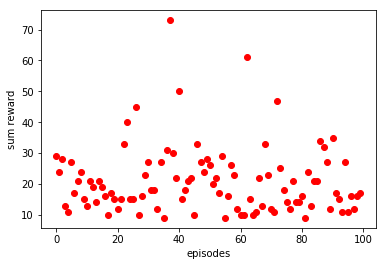

Average reward per episode : 20.95


In [21]:
# Example 1 :
# Selecting actions randomly
# Calulating reward per episode

from torch import randint
import matplotlib.pyplot as plt
import numpy as np

# Just to test initial observation
initial_obs = env.reset() # reset environment
print("initial observation = {}".format(initial_obs))

reward_array = []
episode_count = 100

plt.xlabel('episodes')
plt.ylabel('sum reward')

for i in range(episode_count):
    # obs = reset initial obs, done = False, sum_reward per episode = 0
    obs, done, sum_reward = env.reset(), False, 0
    
    while (done != True) :
        # Tensor A size : torch.Size([1])
        A =  randint(0,env.action_space.n,(1,))  # get a random action from 0 (inclusive) to 2 (exclusive)
        
        #env.render() # will open a GUI window and show you the cartpole.
        
        obs, reward, done, info = env.step(A.item()) # apply the random action to the environment
        sum_reward += reward
        
    reward_array.append(sum_reward) # add sum_reward to reward array
    
env.close() # close environment

t = np.arange(0, episode_count, 1)
plt.plot(t,reward_array,'ro') # plot with pyplot function the reward array
plt.show()

print("Average reward per episode :",sum(reward_array)/ len(reward_array))

In [16]:
# The Solution that take a random action is very bad.
# In that case, there is 100 episodes and each episode has a 21 as cumulated reward.
# (Reward is 1 for every step taken, including the termination step)
# The environment will return done=True if either 200 timesteps have elapsed (episode success)
# or if the pole has fallen over (angular position of the pole has reached +- 12 degrees) 
# or the cart has left the simulation space (cart position has reached +- 2.4), in which case the episode failed.

# The objective now is to define a policy which allows us to receive 200 rewards per episode.
# By using reinforcement learning techniques such as the DQN algorithm.
